### Importação dos dados



In [2]:
import pandas as pd
import matplotlib.pyplot as plt

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url1)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja1.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [3]:
# Adicionar coluna de identificação de loja
loja1['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'

# Concatenar todos os dados em um único DataFrame
dados_completos = pd.concat([loja1, loja2, loja3, loja4], ignore_index=True)

In [4]:
# Faturamento de cada loja
faturamento = dados_completos.groupby('Loja')['Preço'].sum().sort_values(ascending=False)
print(faturamento)

# Faturamento total das lojas
faturamento_total = dados_completos['Preço'].sum()
print(f"Faturamento total de todas as lojas: R${faturamento_total:,.2f}")

Loja
Loja 1    1534509.12
Loja 2    1488459.06
Loja 3    1464025.03
Loja 4    1384497.58
Name: Preço, dtype: float64
Faturamento total de todas as lojas: R$5,871,490.79


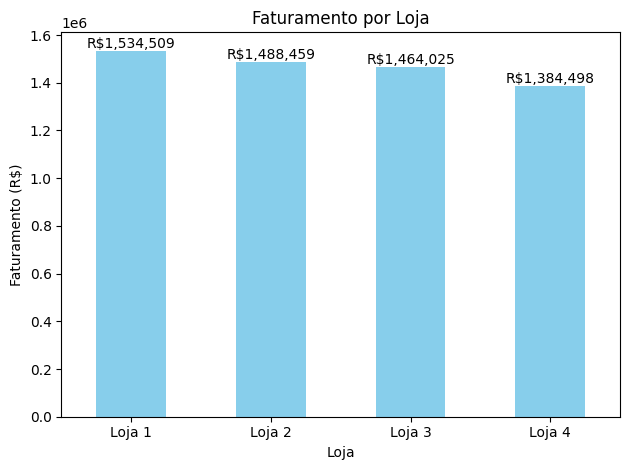

In [5]:
# Gráfico de barras do faturamento por loja
faturamento.plot(kind='bar', color='skyblue')

# Títulos e rótulos
plt.title('Faturamento por Loja')
plt.xlabel('Loja')
plt.ylabel('Faturamento (R$)')
plt.xticks(rotation=0)

# Mostrar o valor no topo de cada barra
for i, valor in enumerate(faturamento):
    plt.text(i, valor, f'R${valor:,.0f}', ha='center', va='bottom')

# Mostrar o gráfico
plt.tight_layout()
plt.show()

# 2. Vendas por Categoria


In [6]:
# Vendas por categoria por lojas
venda_por_loja_categoria = dados_completos.groupby(['Loja', 'Categoria do Produto'])['Preço'].sum().reset_index()
venda_por_loja_categoria


,Loja,Categoria do Produto,Preço
0,Loja 1,brinquedos,23993.78
1,Loja 1,eletrodomesticos,484913.36
2,Loja 1,eletronicos,572659.23
3,Loja 1,esporte e lazer,52387.55
4,Loja 1,instrumentos musicais,121731.69
5,Loja 1,livros,11713.92
6,Loja 1,moveis,250178.11
7,Loja 1,utilidades domesticas,16931.48
8,Loja 2,brinquedos,21262.21
9,Loja 2,eletrodomesticos,464758.13


In [8]:
# Vendas por categoria em todas lojas
venda_por_categoria = dados_completos.groupby('Categoria do Produto')['Preço'].sum().sort_values(ascending=False)
venda_por_categoria

,Preço
Categoria do Produto,
eletronicos,2214099.72
eletrodomesticos,1766337.03
moveis,1010214.00
instrumentos musicais,465029.67
esporte e lazer,190635.39
brinquedos,98140.86
utilidades domesticas,76773.38
livros,50260.74


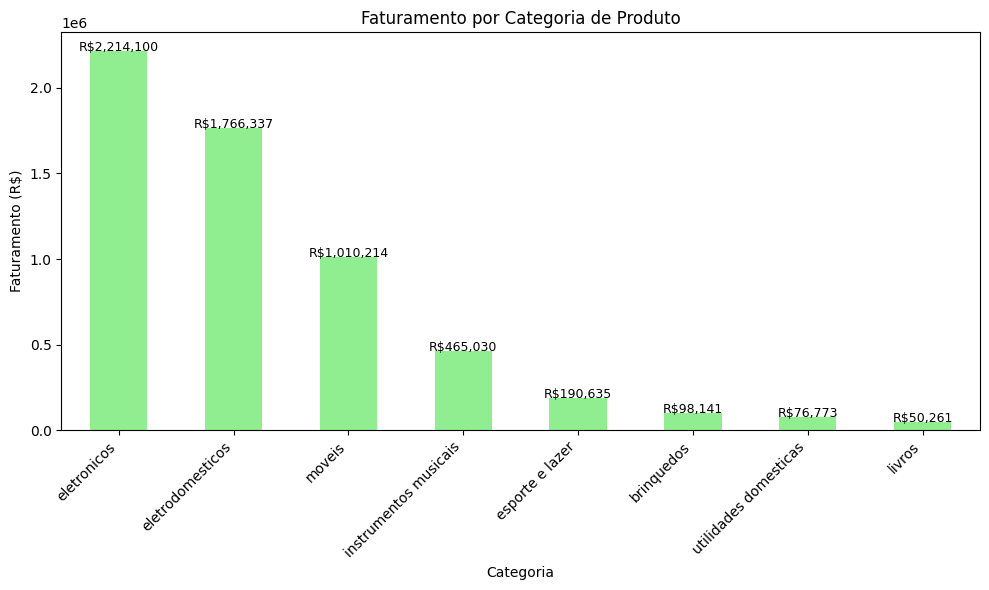

In [9]:
venda_por_categoria.plot(kind='bar', figsize=(10, 6), color='lightgreen')

plt.title('Faturamento por Categoria de Produto')
plt.xlabel('Categoria')
plt.ylabel('Faturamento (R$)')
plt.xticks(rotation=45, ha='right')

# Exibir valores no topo das barras
for i, valor in enumerate(venda_por_categoria):
    plt.text(i, valor + 100, f'R${valor:,.0f}', ha='center', fontsize=9)

plt.tight_layout()
plt.show()


# 3. Média de Avaliação das Lojas

In [44]:
avaliacao_media = dados_completos.groupby('Loja')[f'Avaliação da compra'].mean().round(2)
avaliacao_media

,Avaliação da compra
Loja,
Loja 1,3.98
Loja 2,4.04
Loja 3,4.05
Loja 4,4.00


# 4. Produtos Mais e Menos Vendidos

In [32]:
# Agrupar por Loja e Produto, somando o Preço
receita_por_produto_loja = dados_completos.groupby(['Loja', 'Produto'])['Preço'].sum().reset_index()

# Ordenar por Loja e Receita (decrescente para mais vendidos)
receita_ordenada = receita_por_produto_loja.sort_values(['Loja', 'Preço'], ascending=[True, False])

# Agrupar e exibir os Top 3 produtos MAIS e MENOS vendidos por loja
for loja, grupo in receita_ordenada.groupby('Loja'):
    # Top 3 MAIS
    top3_mais = grupo.head(3).reset_index(drop=True)
    print(f"\n{loja} - TOP 3 produtos que MAIS dinheiro geraram:")
    for i, row in top3_mais.iterrows():
        print(f"{i + 1}. {row['Produto']} - Ingresos: R${row['Preço']:,.2f}")

    # Top 3 MENOS (ordenando o grupo por Preço crescente)
    top3_menos = grupo.sort_values('Preço').head(3).reset_index(drop=True)
    print(f"\n{loja} - TOP 3 produtos que MENOS dinheiro geraram:")
    for i, row in top3_menos.iterrows():
        print(f"{i + 1}. {row['Produto']} - Ingresos: R${row['Preço']:,.2f}")



Loja 1 - TOP 3 produtos que MAIS dinheiro geraram:
1. TV Led UHD 4K - Ingresos: R$189,534.28
2. Geladeira - Ingresos: R$149,524.28
3. Celular Plus X42 - Ingresos: R$130,536.40

Loja 1 - TOP 3 produtos que MENOS dinheiro geraram:
1. Corda de pular - Ingresos: R$870.89
2. Dinossauro Rex - Ingresos: R$918.40
3. Cubo mágico 8x8 - Ingresos: R$929.27

Loja 2 - TOP 3 produtos que MAIS dinheiro geraram:
1. Celular Plus X42 - Ingresos: R$150,967.83
2. TV Led UHD 4K - Ingresos: R$137,833.06
3. Geladeira - Ingresos: R$130,176.48

Loja 2 - TOP 3 produtos que MENOS dinheiro geraram:
1. Cubo mágico 8x8 - Ingresos: R$858.22
2. Dinossauro Rex - Ingresos: R$1,027.41
3. Corda de pular - Ingresos: R$1,142.54

Loja 3 - TOP 3 produtos que MAIS dinheiro geraram:
1. Geladeira - Ingresos: R$133,185.99
2. TV Led UHD 4K - Ingresos: R$128,892.11
3. Celular Plus X42 - Ingresos: R$124,300.84

Loja 3 - TOP 3 produtos que MENOS dinheiro geraram:
1. Cubo mágico 8x8 - Ingresos: R$853.81
2. Dinossauro Rex - Ingresos: 

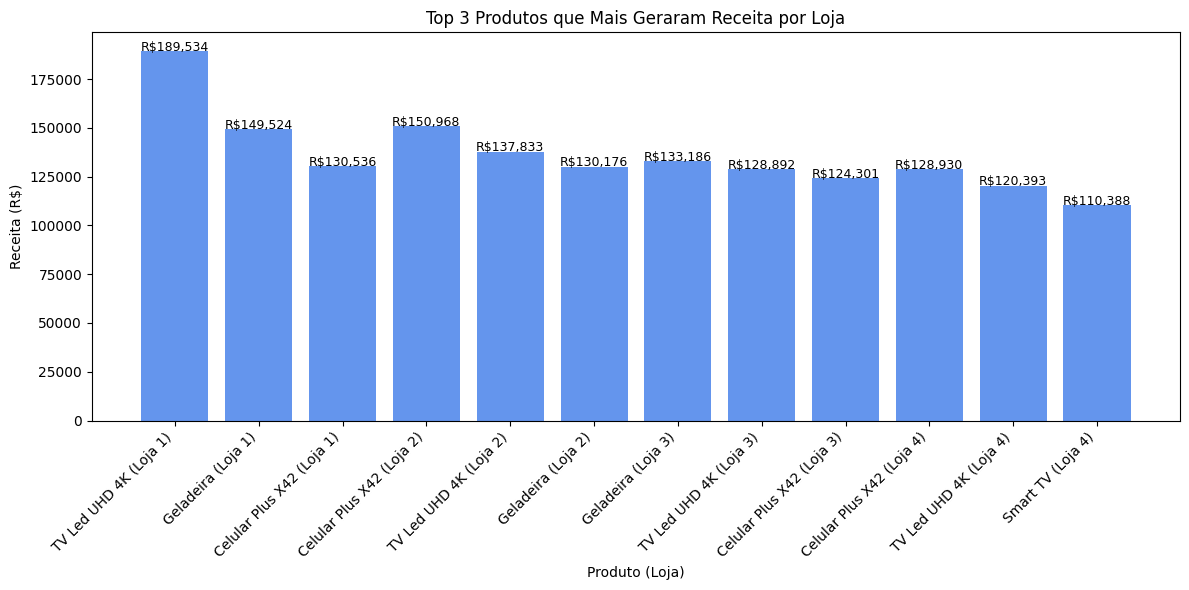

In [23]:
# Gerando gráfico de venda por produto em cada loja

# Selecionar os 3 produtos com maior receita por loja
top3_por_loja = receita_por_produto_loja.sort_values(['Loja', 'Preço'], ascending=[True, False])\
                                        .groupby('Loja')\
                                        .head(3)\
                                        .reset_index(drop=True)

# Criar uma coluna combinada para exibir no eixo X (Produto + Loja)
top3_por_loja['Produto_Loja'] = top3_por_loja['Produto'] + ' (' + top3_por_loja['Loja'] + ')'

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(top3_por_loja['Produto_Loja'], top3_por_loja['Preço'], color='cornflowerblue')

# Títulos e rótulos
plt.title('Top 3 Produtos que Mais Geraram Receita por Loja')
plt.xlabel('Produto (Loja)')
plt.ylabel('Receita (R$)')
plt.xticks(rotation=45, ha='right')

# Mostrar valores no topo das barras
for i, valor in enumerate(top3_por_loja['Preço']):
    plt.text(i, valor + 100, f'R${valor:,.0f}', ha='center', fontsize=9)

plt.tight_layout()
plt.show()

# 5. Frete Médio por Loja


In [20]:
# Garantir que o custo de envio é numérico
dados_completos['Frete'] = pd.to_numeric(dados_completos['Frete'], errors='coerce')

# Calcular o frete médio por loja
frete_medio = dados_completos.groupby('Loja')['Frete'].mean().round(2).sort_values(ascending=False)
frete_medio


,Frete
Loja,
Loja 1,34.69
Loja 2,33.62
Loja 3,33.07
Loja 4,31.28


# 6. Gráficos MAIS importantes

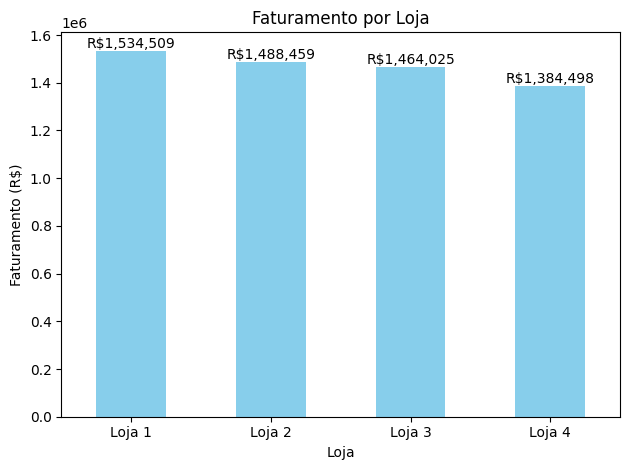

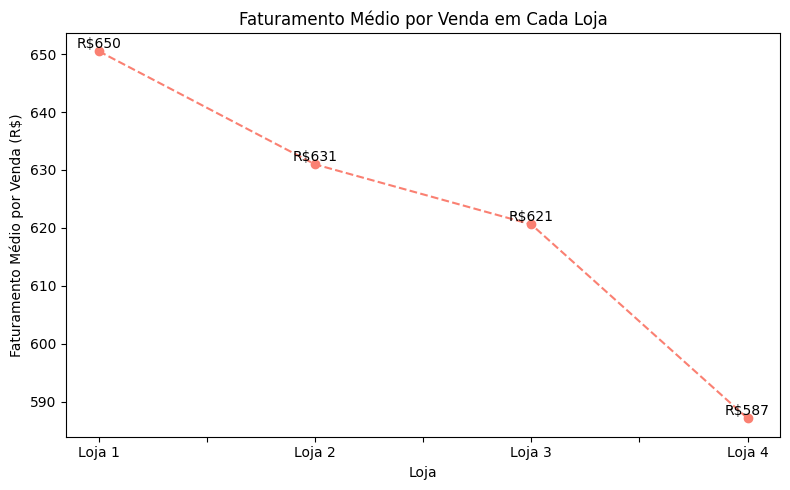

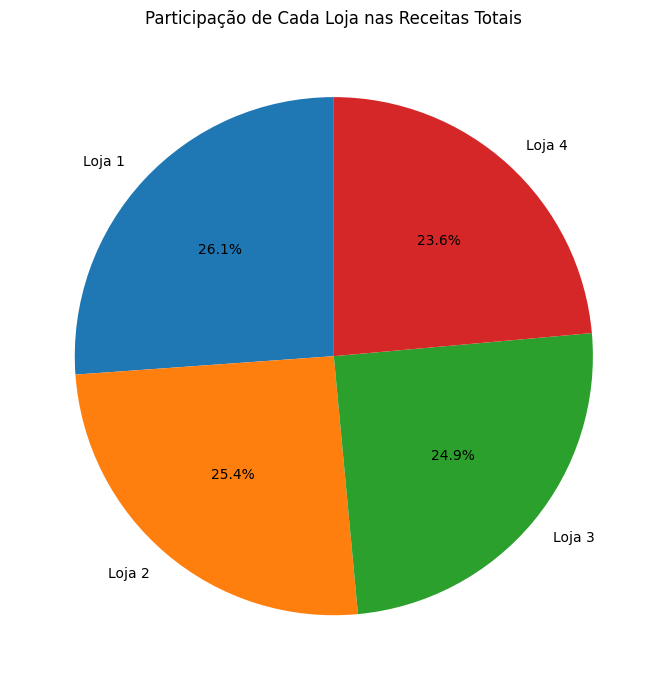

In [74]:
# Agrupar dados
receitas_totais = dados_completos.groupby('Loja')['Preço'].sum()
receita_media = dados_completos.groupby('Loja')['Preço'].mean().round(2)
distribuicao_receitas = receitas_totais

# 1. Gráfico de barras: Faturamento por loja
receitas_totais.plot(kind='bar', color='skyblue')
# Títulos e rótulos
plt.title('Faturamento por Loja')
plt.xlabel('Loja')
plt.ylabel('Faturamento (R$)')
plt.xticks(rotation=0)
# Mostrar o valor no topo de cada barra
for i, valor in enumerate(receitas_totais):
    plt.text(i, valor, f'R${valor:,.0f}', ha='center', va='bottom')
# Mostrar o gráfico
plt.tight_layout()
plt.show()


# 2. Gráfico de Linha: Faturamento Médio por Loja
# Criar gráfico de barras
plt.figure(figsize=(8, 5))
receita_media.plot(kind='line', marker='o', linestyle='--', color='salmon')
# Títulos e rótulos
plt.title('Faturamento Médio por Venda em Cada Loja')
plt.xlabel('Loja')
plt.ylabel('Faturamento Médio por Venda (R$)')
plt.xticks(rotation=0)
# Mostrar o valor no topo de cada barra
for i, valor in enumerate(receita_media):
    plt.text(i, valor, f'R${valor:,.0f}', ha='center', va='bottom')
plt.tight_layout()
plt.show()

# 3. Gráfico de Pizza: Distruibuição do total
plt.figure(figsize=(7, 7))
distribuicao_receitas.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Participação de Cada Loja nas Receitas Totais')
plt.ylabel('')
plt.tight_layout()
plt.show()

# 7. Recomendação para o Sr João:

Baseado na análise dos dados, aqui está a recomendação para o Senhor João:

A Loja 1 apresenta o melhor cenário para venda pelos seguintes motivos:

- Maior faturamento total
- Mix de produtos bem distribuído, com forte presença em eletrônicos e eletrodomésticos
- Embora tenha o frete mais alto, a diferença não é significativa em
relação às outras lojas
- Possui produtos de alto valor agregado entre os mais vendidos (TV Led UHD 4K)

Pontos importantes sobre a Loja 1:

- A avaliação média de 3,98 está próxima às demais lojas
- Tem uma base sólida de vendas em diferentes categorias
- Localização estratégica com bom volume de vendas

As outras lojas, embora operacionais, apresentam faturamento menor e algumas limitações:

- Loja 2: Foco em produtos de menor valor (livros e instrumentos musicais)
- Loja 3: Concentração em móveis, que têm ciclo de compra mais longo
- Loja 4: Menor faturamento entre todas as lojas